In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import util
from importlib import reload
reload(util)
from util import *
from scipy.stats import binned_statistic

# Kennlinien PM3

In [2]:
eta = .03
rt = 506/60
T = 1/eta**2*1/rt
T

131.75230566534913

In [3]:
N=1148
c=N/T
dc=np.sqrt(N)/T
dc/c

0.029514066805047763

## Plot

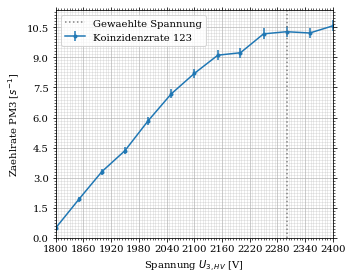

In [4]:
%matplotlib inline

T = 140
fig, ax = set_up_plot()
calib = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx',
                      sheet_name='Kennl')
ax.set_xlabel('Spannung $U_{3,HV}$ [V]')
ax.set_ylabel('Zaehlrate PM3 [$s^{-1}$]')
ax.errorbar(calib['U/V'], calib["N123"]/T, yerr=np.sqrt(calib["N123"])/T,
            marker='.', label='Koinzidenzrate 123')
ax.axvline(2300, linestyle='dotted', color='gray', label='Gewaehlte Spannung')
ax.legend()
ax.set_xlim([calib['U/V'].min(), calib['U/V'].max()])
ax.set_ylim(0)
save_fig(fig, 'kennlinie_123', 'vorversuch')


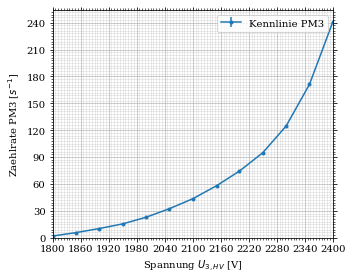

In [5]:
fig, ax = set_up_plot()
calib = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx',
                      sheet_name='Kennl')
ax.set_xlabel('Spannung $U_{3,HV}$ [V]')
ax.set_ylabel('Zaehlrate PM3 [$s^{-1}$]')
ax.errorbar(calib['U/V'], calib["N3"]/T, yerr=np.sqrt(calib["N3"])/T,
            marker='.', label='Kennlinie PM3')
ax.legend()
ax.set_xlim([calib['U/V'].min(), calib['U/V'].max()])
ax.set_ylim(0)
save_fig(fig, 'kennlinie_pm3', 'vorversuch')

# Peakhoehen der Photomultiplier

In [6]:
peaks = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx')
peak_labels = ['P1', 'P2', 'P3']
bin_offsets = [8, 15, 40]
scale_factors = [100, 10, 1]

In [7]:
for peak in peak_labels:  # nice and dirty :{}
    cur = peaks[peak]
    print(f"{peak} & {cur.min():.2f} & {cur.max():.2f} & {cur.mean():.2f} & {cur.median():.2f} & {cur.mean()/cur.std():.2f} \\\\")
peaks['dP1'] = calculate_peak_uncertainty(peaks["P1"])
peaks['dP2'] = calculate_peak_uncertainty(peaks["P2"])
peaks['dP3'] = calculate_peak_uncertainty(peaks["P3"])


P1 & 0.20 & 3.00 & 0.72 & 0.60 & 1.31 \\
P2 & 0.20 & 11.40 & 4.44 & 3.60 & 1.89 \\
P3 & 3.60 & 51.20 & 9.30 & 7.00 & 1.06 \\


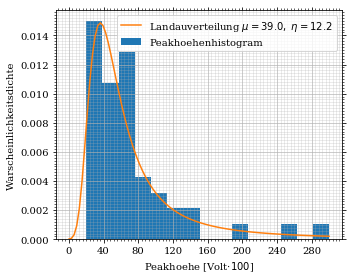

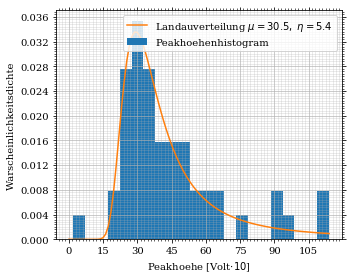

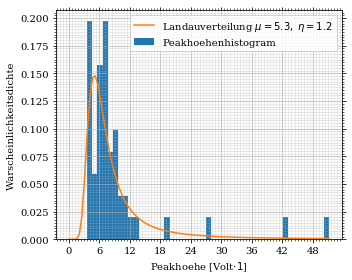

In [8]:
for index, peak in enumerate(peak_labels):
    plot_hist(peaks[peak], calculate_bins(peaks[peak]) + bin_offsets[index],
              scale_factors[index],
              save=(f'muon_{peak}_spec', 'vorversuch'))

# Statistische Auswertung der Langzeitmessung

In [10]:
counts = load_counts('../messungen/LM_2019_12_20.txt')
interval = (24, 150)

In [16]:
continous(counts, interval)

(2284.5670041107596,
 17.920165966087293,
 14788,
 5208.75,
 [1691.0727468217476,
  1941.9569883386273,
  2073.5778898432864,
  2150.8399584168337,
  2198.4854603882904,
  2228.649422367671,
  2248.0403530470658,
  2260.622878770272,
  2268.835615801081,
  2274.216322707795,
  2277.750151601415,
  2280.0746994393876,
  2281.6053663448415,
  2282.6139632173627,
  2283.2788508733183,
  2283.717287097231,
  2284.006453996329,
  2284.197195887302,
  2284.3230246968747,
  2284.4060361778124,
  2284.4608023152377,
  2284.4969346923817,
  2284.5207736832017,
  2284.536502054614,
  2284.546879313538,
  2284.553726048772,
  2284.5582434194002,
  2284.5612239170055,
  2284.5631904099864,
  2284.5644878772227,
  2284.56534393021,
  2284.565908743696,
  2284.5662814009484,
  2284.566527275832,
  2284.5666895012137,
  2284.5667965356365,
  2284.5668671557096,
  2284.566913750017,
  2284.5669444924033,
  2284.566964775875,
  2284.5669781586757,
  2284.5669869884937,
  2284.5669928143056,
  2284.5669

In [12]:
poisson, gauss, N = binned_likelihood(counts, interval)

((<Figure size 360x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b30ae5278>),
 2263.6033071565366,
 (31.093969139121782, 31.90186452553553),
 -146787.68145272764)

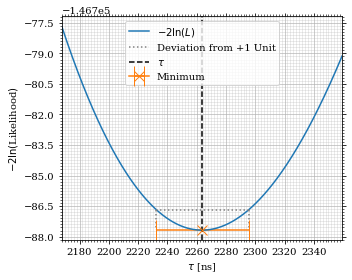

In [13]:
maximize_and_plot_likelihood(poisson, (1000, 3000), save=('poisson', 'haupt'))

((<Figure size 360x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3b301ed9e8>),
 2269.835038293664,
 (30.152362502227334, 30.977313295185468),
 206.42320956201473)

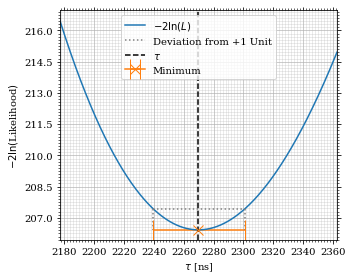

In [14]:
maximize_and_plot_likelihood(gauss, (1000, 3000), save=('poisson', 'haupt'))